# Stemmer VS. Lemmatizer

# Stemming

In [4]:
# From Social Media and Network Analytics, Lab Notes 
import json
import nltk
import string
import re
from collections import Counter
nltk.download('stopwords')
import matplotlib.pyplot as mpl
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

nltk.download('stopwords')


fJsonFileName = 'Running_for_MentalHealth.json'

freqNum = 50

tweetTokeniser = nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '...', '...', '"', "'", '`', '’', 'http', 'https']
tweetStemmer = nltk.stem.PorterStemmer()

termFreqCounter_stemming = Counter()

def processText(text, tokenizer, stemmer, stopwords):
    tokens = tokenizer.tokenize(text.lower()) 
    return [stemmer.stem(token) for token in tokens if token not in stopwords and not token.isdigit()]

with open(fJsonFileName, 'r', encoding='utf-8') as f:
    dSubmissions = json.load(f)

    for submission in dSubmissions['submissions']:
        title = submission.get('title', '')
        title = re.sub(u"(\u2018|\u2019|\u2014)", "", title)
        lTokensTitle = processText(title, tweetTokeniser, tweetStemmer, lStopwords)
        termFreqCounter_stemming.update(lTokensTitle)

        for comment in submission.get('comments', []):
            comment_text = comment.get('body', '')
            comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
            lTokensComment = processText(comment_text, tweetTokeniser, tweetStemmer, lStopwords)
            termFreqCounter_stemming.update(lTokensComment)

for term, count in termFreqCounter_stemming.most_common(freqNum):
    print(f"{term}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


run: 9038
feel: 3817
get: 2814
like: 2583
time: 2519
train: 2222
go: 2142
marathon: 2134
race: 2047
day: 1817
week: 1750
mile: 1682
start: 1577
mental: 1425
also: 1420
im: 1325
realli: 1306
help: 1284
first: 1283
think: 1282
good: 1265
one: 1244
pace: 1223
year: 1201
work: 1183
tri: 1172
long: 1144
much: 1134
thing: 1131
take: 1130
make: 1089
back: 1044
even: 965
bodi: 963
would: 959
know: 946
need: 940
want: 935
walk: 918
way: 888
keep: 873
better: 855
lot: 846
hard: 830
half: 804
dont: 788
peopl: 783
plan: 753
goal: 711
see: 707


# Lemmatizer approach

In [6]:
# From Network Analytics, Lab Notes 
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4') 

fJsonFileName = 'Running_for_MentalHealth.json'

freqNum = 50

tweetTokeniser = nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '...', '...', '"', "'", '`', '’', 'http', 'https']

tweetLemmatizer = nltk.stem.WordNetLemmatizer()

termFreqCounter_lemma = Counter()

def processText(text, tokenizer, lemmatizer, stopwords):
    tokens = tokenizer.tokenize(text.lower())  
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and not token.isdigit()]

with open(fJsonFileName, 'r', encoding='utf-8') as f:
    dSubmissions = json.load(f)

    for submission in dSubmissions['submissions']:
        
        title = submission.get('title', '')
        title = re.sub(u"(\u2018|\u2019|\u2014)", "", title)
        lTokensTitle = processText(title, tweetTokeniser, tweetLemmatizer, lStopwords)
        termFreqCounter_lemma.update(lTokensTitle)

        for comment in submission.get('comments', []):
            comment_text = comment.get('body', '')
            comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
            lTokensComment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
            termFreqCounter_lemma.update(lTokensComment)

for term, count in termFreqCounter_lemma.most_common(freqNum):
    print(f"{term}: {count}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


run: 5141
running: 3897
feel: 2863
time: 2499
like: 2435
get: 2221
marathon: 2083
training: 1890
race: 1882
day: 1817
week: 1750
mile: 1682
also: 1420
im: 1324
really: 1306
first: 1283
good: 1262
go: 1246
one: 1244
year: 1201
pace: 1144
long: 1139
much: 1134
thing: 1131
think: 1111
back: 1042
going: 1037
body: 963
make: 962
would: 959
feeling: 954
mental: 942
even: 932
take: 911
way: 888
work: 866
better: 849
lot: 846
know: 838
hard: 829
half: 814
help: 797
dont: 788
people: 783
need: 783
keep: 778
start: 745
want: 740
goal: 711
try: 705


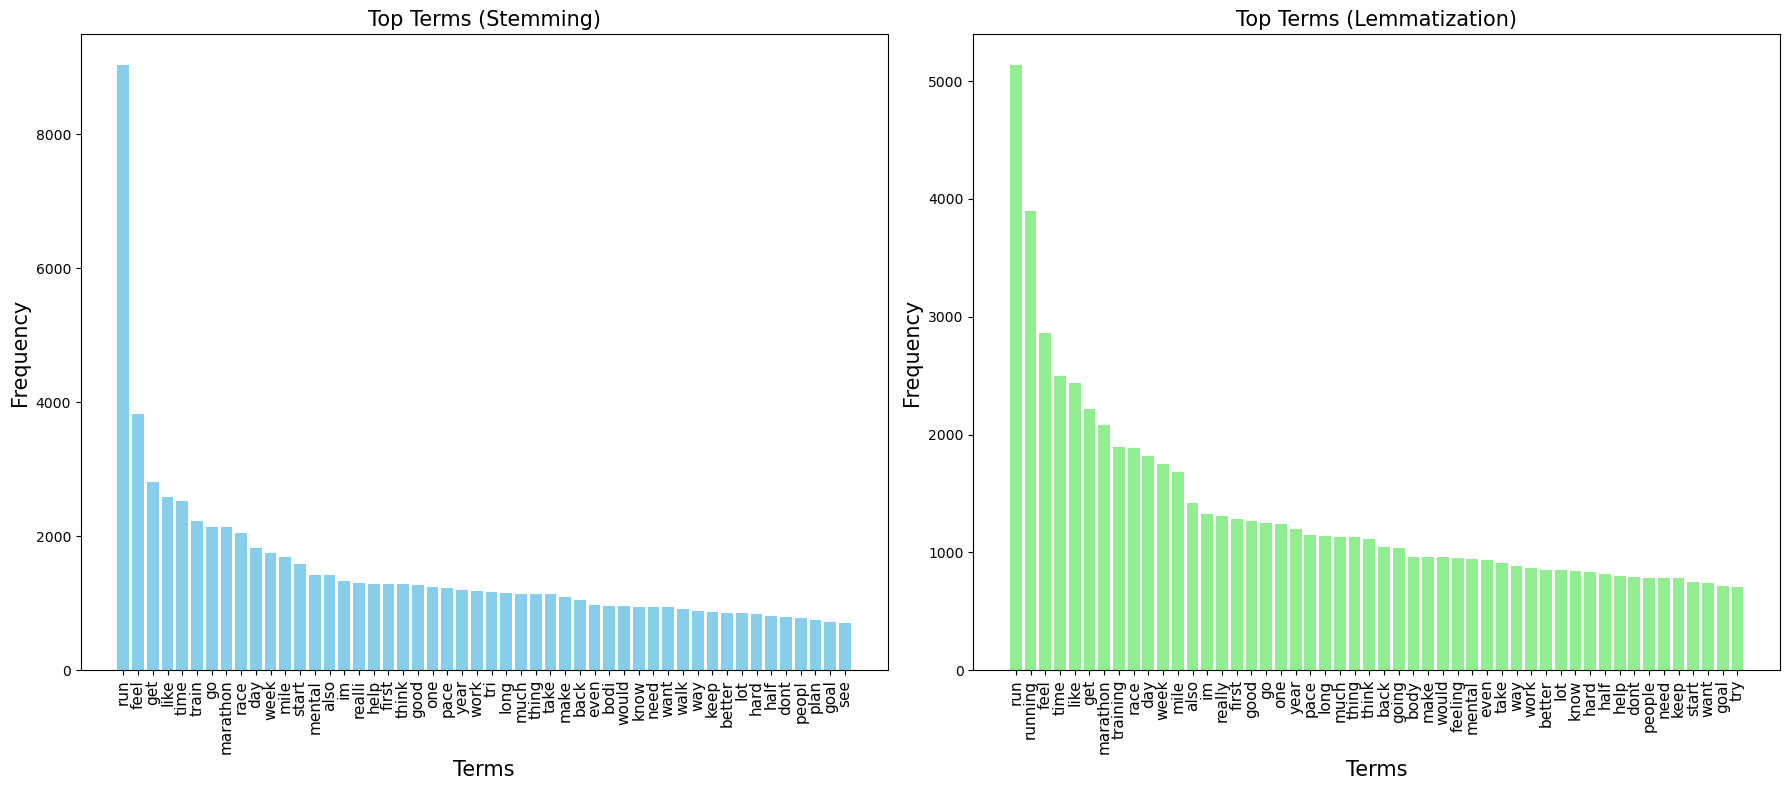

In [7]:
# From the author
import matplotlib.pyplot as plt

terms_stem, counts_stem = zip(*termFreqCounter_stemming.most_common(freqNum))
x_stem = range(len(terms_stem))

terms_lemma, counts_lemma = zip(*termFreqCounter_lemma.most_common(freqNum))
x_lemma = range(len(terms_lemma))


plt.figure(figsize=(18, 8))

# Plot 1: Stemming
plt.subplot(1, 2, 1)
plt.bar(x_stem, counts_stem, color='skyblue')
plt.xticks(x_stem, terms_stem, rotation=90, fontsize = 11)
plt.title("Top Terms (Stemming)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Terms", fontsize = 15)

# Plot 2: Lemmatization
plt.subplot(1, 2, 2)
plt.bar(x_lemma, counts_lemma, color='lightgreen')
plt.xticks(x_lemma, terms_lemma, rotation=90, fontsize = 11)
plt.title("Top Terms (Lemmatization)", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Terms",fontsize = 15)

plt.tight_layout()
plt.show()


In [8]:
# From the author
raw_word_count = 0

with open(fJsonFileName, 'r', encoding='utf-8') as f:
    dSubmissions = json.load(f)

    for submission in dSubmissions['submissions']:
        text = submission.get('title', '')

        for comment in submission.get('comments', []):
            text += ' ' + comment.get('body', '')

        text = re.sub(u"(\u2018|\u2019|\u2014)", "", text)

        words = text.split()
        raw_word_count += len(words)

In [9]:
raw_word_count

495524

In [10]:
# From the author
cleaned_word_count_lemma = 0

for submission in dSubmissions['submissions']:
    title = submission.get('title', '')
    title = re.sub(u"(\u2018|\u2019|\u2014)", "", title)
    lTokensTitle = processText(title, tweetTokeniser, tweetLemmatizer, lStopwords)
    termFreqCounter_lemma.update(lTokensTitle)
    cleaned_word_count_lemma += len(lTokensTitle)

    for comment in submission.get('comments', []):
        comment_text = comment.get('body', '')
        comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
        lTokensComment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
        termFreqCounter_lemma.update(lTokensComment)
        cleaned_word_count_lemma += len(lTokensComment)


In [11]:
cleaned_word_count_lemma

246545

In [13]:
# From the author
tweetTokeniser = TweetTokenizer()

ex = 'First Marathon Done Filled with Joy, Disappointment to Pride'
print("Before tokeniser:" + "   " + ex)

tokens = tweetTokeniser.tokenize(ex)

print("After tokeniser:" + "   " + str(tokens))

Before tokeniser:   First Marathon Done Filled with Joy, Disappointment to Pride
After tokeniser:   ['First', 'Marathon', 'Done', 'Filled', 'with', 'Joy', ',', 'Disappointment', 'to', 'Pride']
